In [1]:
# 分析时间：2013年1月1日-2022年12月31日，总共10年时间
start_date_str = "2012-01-01"
end_date_str = "2022-12-31"

In [2]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

%matplotlib inline



In [3]:
import warnings


warnings.simplefilter("ignore")

plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

%config InlineBackend.figure_format = 'retina'

In [4]:
import QuantLib as ql

In [5]:
import QuantLib as ql
import QuantLib as ql
start_date = datetime.datetime.strptime(start_date_str, "%Y-%m-%d")
end_date = datetime.datetime.strptime(end_date_str, "%Y-%m-%d")
print(start_date, end_date)

2012-01-01 00:00:00 2022-12-31 00:00:00


## 1.读取数据

In [6]:
# 到期收益率
raw_yield_to_maturity_df = pd.read_excel('./data/国债到期收益率.xlsx')
raw_yield_to_maturity_df = raw_yield_to_maturity_df.rename(columns={'指标名称': 'Date',
       '国债到期收益率:6个月': "6M", '国债到期收益率:1年': "1Y", '国债到期收益率:2年': "2Y", '国债到期收益率:3年': "3Y",
       '国债到期收益率:4年': "4Y", '国债到期收益率:5年': "5Y", '国债到期收益率:6年': "6Y", '国债到期收益率:7年': "7Y", 
        '国债到期收益率:8年': "8Y",'国债到期收益率:9年': "9Y", '国债到期收益率:10年': "10Y", '国债到期收益率:15年': "15Y", 
        '国债到期收益率:20年': "20Y", '国债到期收益率:30年': "30Y"})
raw_yield_to_maturity_df

,Date,6M,1Y,2Y,3Y,4Y,5Y,6Y,7Y,8Y,9Y,10Y,15Y,20Y,30Y
0,2008-07-01,3.2769,3.4474,3.8065,4.0301,4.1697,4.3093,4.3498,4.3903,4.4292,4.4682,4.5072,4.9618,4.9639,4.9498
1,2008-07-02,3.4055,3.5461,3.8015,3.9506,4.0883,4.2260,4.3019,4.3778,4.4282,4.4787,4.5291,4.9442,4.9462,4.9501
2,2008-07-03,3.3343,3.4972,3.8687,3.9820,4.1085,4.2350,4.3163,4.3976,4.4436,4.4896,4.5356,4.9453,4.9469,4.9501
3,2008-07-04,3.3397,3.4763,3.8179,3.9854,4.1031,4.2209,4.3183,4.4157,4.4618,4.5080,4.5542,4.9469,4.9479,4.9501
4,2008-07-07,3.3679,3.4796,3.8138,3.9561,4.0850,4.2140,4.2849,4.3559,4.4215,4.4871,4.5527,4.9226,4.9285,4.9404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,2023-03-13,2.1958,2.2696,2.4373,2.5289,2.6127,2.6965,2.7655,2.8345,2.8473,2.8600,2.8728,3.0310,3.1147,3.2772
3668,2023-03-14,2.1950,2.2655,2.4475,2.5215,2.6046,2.6877,2.7591,2.8305,2.8417,2.8528,2.8640,3.0196,3.1047,3.2692
3669,2023-03-15,2.2050,2.2638,2.4432,2.5278,2.6121,2.6963,2.7663,2.8363,2.8474,2.8584,2.8695,3.0152,3.1033,3.2700
3670,2023-03-16,2.1799,2.2598,2.4193,2.5182,2.5953,2.6723,2.7483,2.8242,2.8342,2.8441,2.8541,2.9998,3.0857,3.2503


In [7]:
yield_to_maturity_df = raw_yield_to_maturity_df[(raw_yield_to_maturity_df['Date']>=start_date)
                                                & (raw_yield_to_maturity_df['Date']<=end_date)].reset_index(drop=True)

In [8]:
yield_to_maturity_df

,Date,6M,1Y,2Y,3Y,4Y,5Y,6Y,7Y,8Y,9Y,10Y,15Y,20Y,30Y
0,2012-01-04,2.6380,2.6754,2.8199,2.8668,2.9462,3.0255,3.1812,3.3368,3.3695,3.4023,3.4350,3.8059,3.9458,4.0607
1,2012-01-05,2.6279,2.6750,2.8066,2.8984,2.9796,3.0608,3.2045,3.3482,3.3771,3.4061,3.4350,3.8038,3.9441,4.0509
2,2012-01-06,2.6404,2.6767,2.8140,2.8913,2.9948,3.0983,3.2176,3.3369,3.3679,3.3990,3.4300,3.8027,3.9430,4.0498
3,2012-01-09,2.6409,2.6772,2.8090,2.8925,2.9973,3.1022,3.2123,3.3224,3.3466,3.3708,3.3950,3.7470,3.8873,4.0488
4,2012-01-10,2.5919,2.6809,2.8318,2.9089,3.0060,3.1032,3.2152,3.3272,3.3648,3.4024,3.4400,3.8006,3.8878,4.0622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2739,2022-12-26,2.1778,2.2398,2.3669,2.4616,2.5396,2.6175,2.7175,2.8175,2.8249,2.8324,2.8398,2.9777,3.0579,3.2225
2740,2022-12-27,2.2125,2.2615,2.3889,2.4898,2.5777,2.6656,2.7526,2.8395,2.8475,2.8556,2.8636,3.0014,3.0676,3.2182
2741,2022-12-28,2.2398,2.2732,2.4056,2.4746,2.5771,2.6795,2.7595,2.8395,2.8496,2.8598,2.8699,3.0078,3.0679,3.2125
2742,2022-12-29,2.1737,2.1952,2.3605,2.4405,2.5415,2.6425,2.7314,2.8202,2.8255,2.8309,2.8362,2.9741,3.0459,3.2021


In [9]:
def build_bootstrap_curve(test_date):
        # 将利率期限转换为quantlib能够识别的类型
    tenor_list = ['6M', '1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', 
                  '8Y', '9Y', '10Y', '15Y', '20Y', '30Y']
    ql_tenor_list = [ql.Period(6, ql.Months), ql.Period(1, ql.Years), ql.Period(2, ql.Years),
                    ql.Period(3, ql.Years), ql.Period(4, ql.Years), ql.Period(5, ql.Years),
                    ql.Period(6, ql.Years), ql.Period(7, ql.Years), ql.Period(8, ql.Years),
                    ql.Period(9, ql.Years), ql.Period(10, ql.Years), ql.Period(15, ql.Years),
                    ql.Period(20, ql.Years), ql.Period(30, ql.Years)]

    maturities = [0.50, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30]
    ytm_list = yield_to_maturity_df[yield_to_maturity_df['Date']==test_date][tenor_list].values.tolist()[0]
    ytm_list = [var/100 for var in ytm_list]
    numberOfBonds = len(maturities)
    cleanPrice = [100.0] * numberOfBonds
    quote = [ql.SimpleQuote(c) for c in cleanPrice]

    quoteHandle = [ql.QuoteHandle(q) for q in quote]

    frequency = ql.Annual
    dc = ql.ActualActual(ql.ActualActual.ISMA)
    accrualConvention = ql.ModifiedFollowing
    convention = ql.ModifiedFollowing
    redemption = 100.0
    calendar = ql.China(ql.China.IB)

    today = calendar.adjust(ql.Date(test_date.day, test_date.month, test_date.year))
    ql.Settings.instance().evaluationDate = today

    bondSettlementDays = 0
    bondSettlementDate = calendar.advance(today, ql.Period(bondSettlementDays, ql.Days))

    instruments = []

    for j in range(len(maturities)):
        temp_maturity_value = maturities[j]
        temp_ql_maturity_value = None
        if temp_maturity_value <1:
            temp_ql_maturity_value = ql.Period(int(temp_maturity_value * 12), ql.Months)
        else:
            temp_ql_maturity_value = ql.Period(int(temp_maturity_value), ql.Years)
        maturity = calendar.advance(bondSettlementDate,temp_ql_maturity_value)
        schedule = ql.Schedule(bondSettlementDate,
                              maturity,
                              ql.Period(frequency),
                              calendar,
                              accrualConvention,
                              accrualConvention,
                              ql.DateGeneration.Backward,
                              False)
        helper = ql.FixedRateBondHelper(quoteHandle[j],
                                       bondSettlementDays,
                                       100.0,
                                       schedule,
                                       [ytm_list[j]],
                                       dc,
                                       convention,
                                       redemption)
        instruments.append(helper)

    tolerance = 1.0e-10
    max = 5000
    svensson = ql.SvenssonFitting()
    ns = ql.NelsonSiegelFitting()

    ts0 = ql.PiecewiseLogCubicDiscount(
            bondSettlementDate,
            instruments,
            dc)
    

    new_tenor = []
    new_ytm_list = []
    bootstrap_value_list = []
    

    # print("{0:>9}{1:>9}{2:>9}{3:>9}{4:>9}".format(
    #         "tenor", "ytm", "spline", "svensson", "Nelson"))


    for i in range(len(instruments)):
        cfs = instruments[i].bond().cashflows()
        cfSize = len(instruments[i].bond().cashflows())
        tenor = dc.yearFraction(today, cfs[cfSize - 1].date())

        temp_ytm = 100.0 * ytm_list[i]
        temp_bootstrap_value = 100.0 * ts0.zeroRate(cfs[cfSize - 1].date(), dc, ql.Compounded, frequency).rate()
        
        new_tenor.append(tenor)
        new_ytm_list.append(temp_ytm)
        bootstrap_value_list.append(temp_bootstrap_value)
        
    return bootstrap_value_list

test_date_str = "2013-01-08"
test_date =  datetime.datetime.strptime(test_date_str, "%Y-%m-%d")
build_bootstrap_curve(test_date)

[2.864510617346938,
 2.9068000000000094,
 3.0420273204735837,
 3.103261472355512,
 3.178365908576941,
 3.249480296671581,
 3.3788313082672605,
 3.510199431393324,
 3.5528077687771775,
 3.5994357625316775,
 3.6426191880617687,
 3.8648592282506167,
 4.100878028951693,
 4.433193274539993]

In [10]:
# 获取模型值
model_ytm_df = pd.DataFrame(columns= yield_to_maturity_df.columns)

for i in range(yield_to_maturity_df.shape[0]):
    temp_date = yield_to_maturity_df['Date'][i]
    temp_result = [temp_date]
    temp_value_list = build_bootstrap_curve(temp_date)
    temp_result.extend(temp_value_list) 
    model_ytm_df.loc[len(model_ytm_df.index)] = temp_result
model_ytm_df

,Date,6M,1Y,2Y,3Y,4Y,5Y,6Y,7Y,8Y,9Y,10Y,15Y,20Y,30Y
0,2012-01-04,2.640793,2.675400,2.830108,2.869387,2.951784,3.035060,3.202632,3.372847,3.408592,3.439537,3.474518,3.924888,4.092826,4.235366
1,2012-01-05,2.630616,2.675000,2.812513,2.902288,2.986314,3.071475,3.225959,3.389599,3.412835,3.441111,3.471791,3.920362,4.088096,4.217444
2,2012-01-06,2.643211,2.676700,2.815934,2.894887,3.002350,3.111212,3.244261,3.373490,3.399682,3.432189,3.465507,3.919084,4.086815,4.215113
3,2012-01-09,2.658336,2.677200,2.810854,2.896217,3.009639,3.115237,3.232885,3.352443,3.376170,3.403649,3.427613,3.856023,4.022696,4.247243
4,2012-01-10,2.601502,2.680900,2.833940,2.918427,3.015569,3.115396,3.235230,3.356978,3.395983,3.437492,3.477142,3.914939,4.008391,4.260930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2739,2022-12-26,2.189657,2.239800,2.368406,2.465000,2.549113,2.627935,2.732189,2.839539,2.845022,2.851256,2.858881,3.016929,3.109299,3.335515
2740,2022-12-27,2.218609,2.261500,2.390424,2.498295,2.585827,2.675509,2.767399,2.860454,2.866743,2.876001,2.881058,3.039716,3.116253,3.321293
2741,2022-12-28,2.246137,2.273200,2.414106,2.479737,2.583212,2.690260,2.774519,2.859990,2.871123,2.879144,2.887755,3.045384,3.114198,3.313033
2742,2022-12-29,2.179492,2.195200,2.365842,2.443765,2.547984,2.653414,2.747164,2.843485,2.846477,2.849135,2.853382,3.011196,3.094430,3.309259


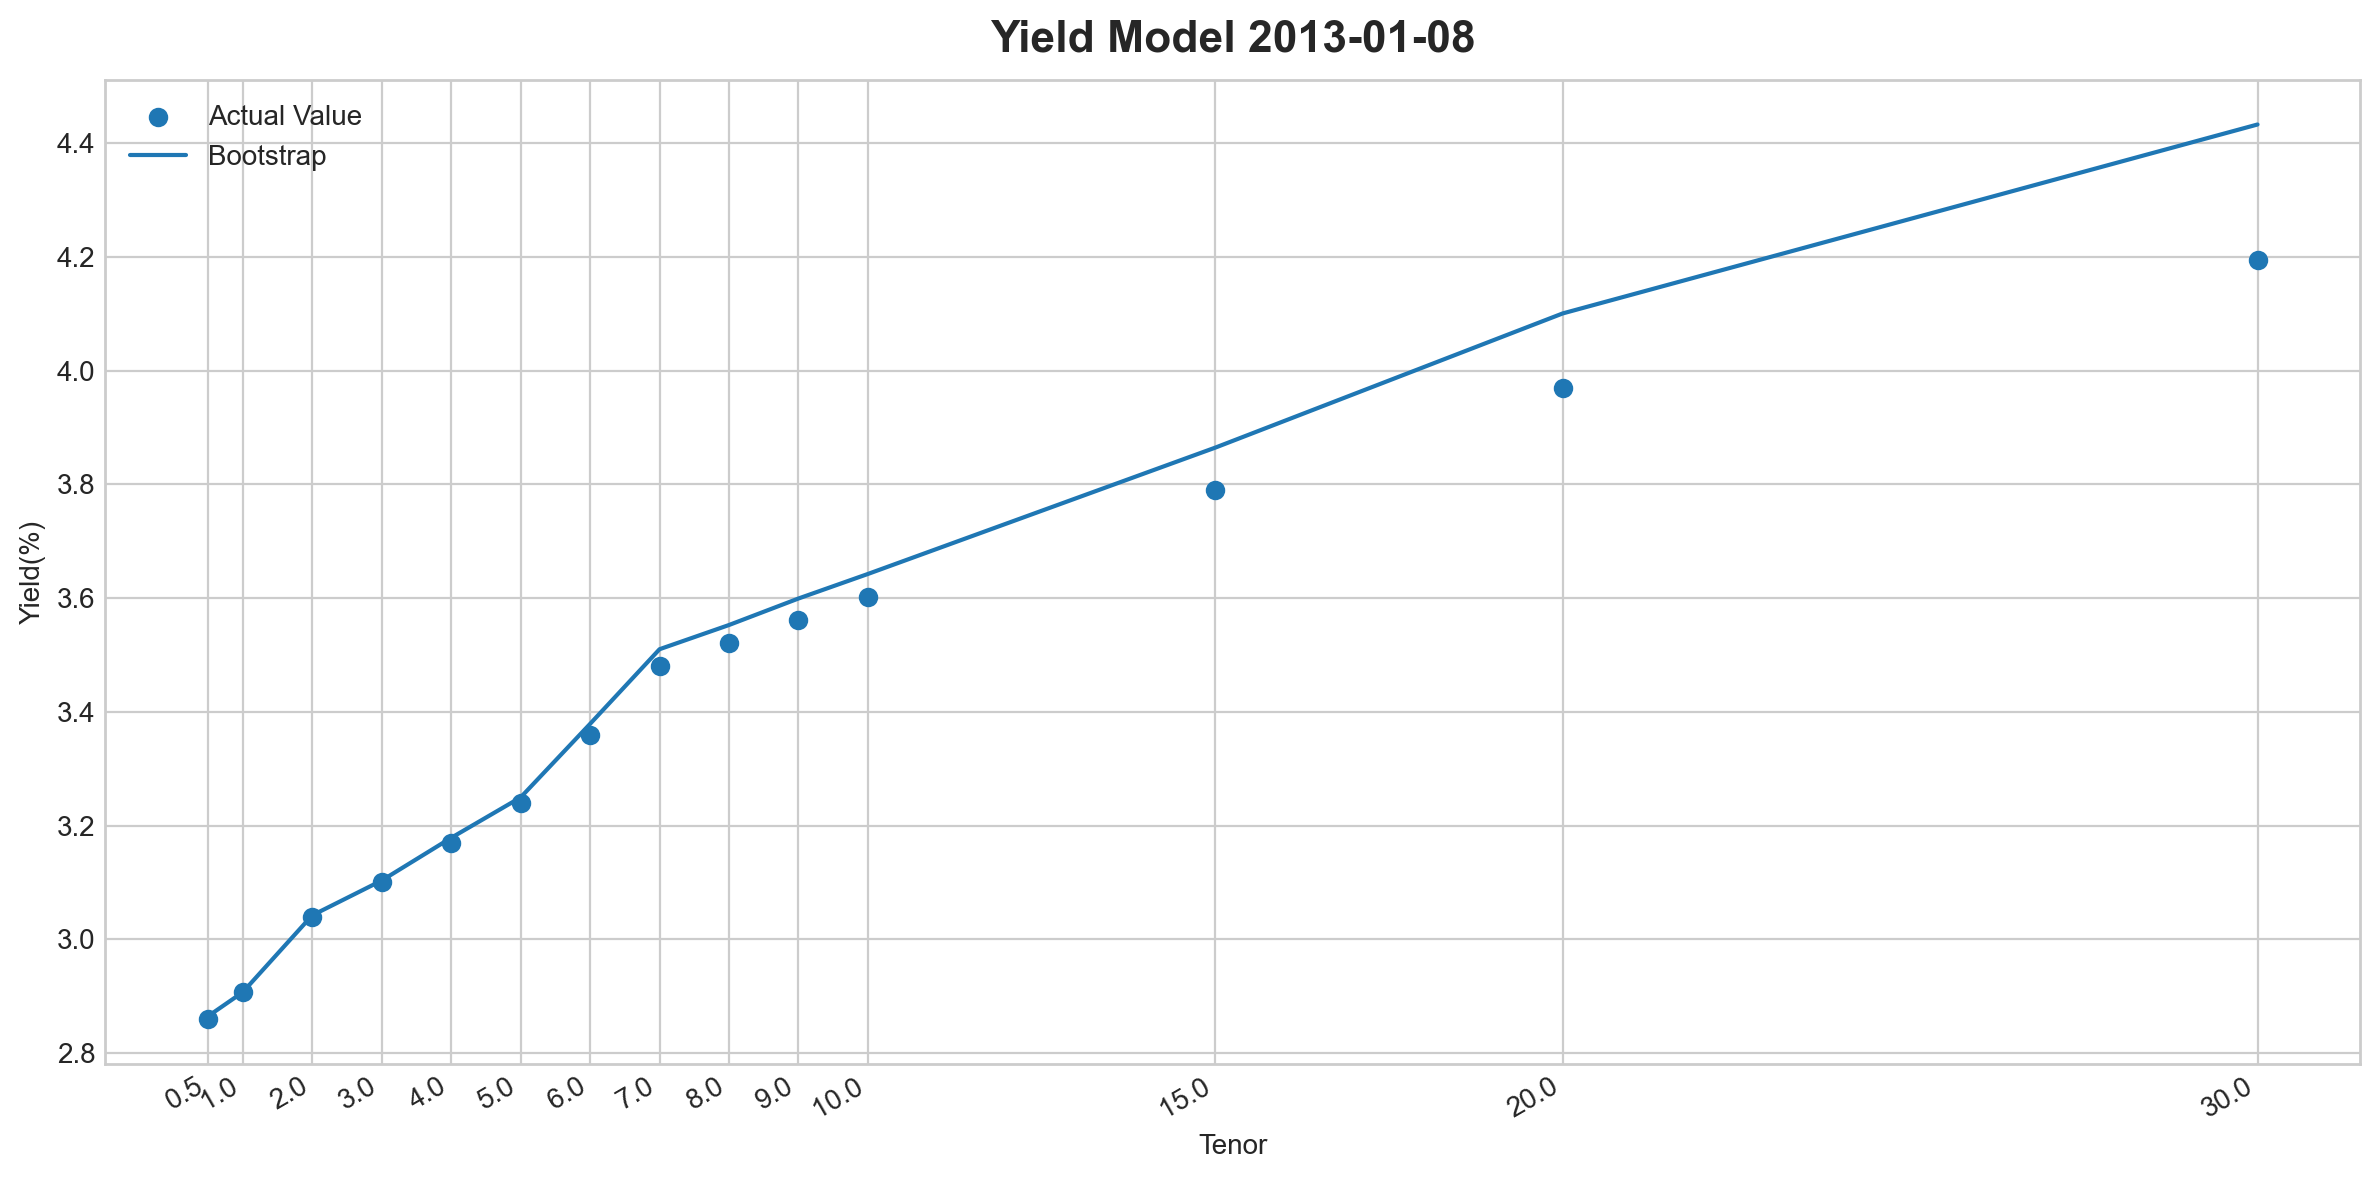

In [11]:
# 选择某一天
test_date_str = "2013-01-08"
test_date =  datetime.datetime.strptime(test_date_str, "%Y-%m-%d")

fig, ax = plt.subplots(figsize=(12, 6))
time_list = [0.50, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30]
tenor_list = ['6M', '1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', 
              '8Y', '9Y', '10Y', '15Y', '20Y', '30Y']

temp_actual_ytm_df = yield_to_maturity_df[yield_to_maturity_df['Date']==test_date][tenor_list]
temp_actual_ytm_list = temp_actual_ytm_df.values[0]



temp_bootstrap_ytm_df = model_ytm_df[model_ytm_df['Date']==test_date][tenor_list]
temp_bootstrap_ytm_list = temp_bootstrap_ytm_df.values[0]


ax.scatter(time_list, temp_actual_ytm_list, label="Actual Value")
ax.plot(time_list, temp_bootstrap_ytm_list, label="Bootstrap")


plt.xticks(time_list)


ax.set_title("Yield Model " + test_date_str)
ax.set_xlabel("Tenor")
ax.set_ylabel("Yield(%)")
fig.autofmt_xdate()
plt.tight_layout()
plt.legend(loc=2)

In [12]:
# 计算MAPE:平均绝对百分比误差
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

In [13]:
# 因子预测分析： 计算MAE(平均绝对误差), MAPE(平均绝对百分比误差)， RMSE(均方根误差)的值
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

In [14]:
# 均方根误差
import math
def rmse(y_true, y_pred):
    MSE = np.square(np.subtract(y_true,y_pred)).mean() 
    RMSE = math.sqrt(MSE)
    return RMSE

In [15]:
columns_list = ['6M', '1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', '8Y', '9Y', '10Y', '15Y', '20Y', '30Y']
mae_list = []
mape_list = []
rmse_list = []
for temp_column in columns_list:
    #print(temp_column)
    temp_mae = mae(yield_to_maturity_df[temp_column], model_ytm_df[temp_column])
    temp_mape = mape(yield_to_maturity_df[temp_column], model_ytm_df[temp_column])
    temp_rmse =  rmse(yield_to_maturity_df[temp_column], model_ytm_df[temp_column]) * 100
    mae_list.append(temp_mae)
    mape_list.append(temp_mape)
    rmse_list.append(temp_rmse)

error_df = pd.DataFrame()
error_df['Tenor'] = columns_list
error_df['MAE'] = mae_list
error_df['MAPE'] = mape_list
error_df['RMSE'] = rmse_list
error_df

,Tenor,MAE,MAPE,RMSE
0,6M,0.028890,1.102814,4.017810
1,1Y,0.005916,0.219974,1.276957
2,2Y,0.006757,0.236811,0.969887
3,3Y,0.006714,0.227415,0.847472
4,4Y,0.008742,0.290399,0.988364
5,5Y,0.011574,0.375070,1.291794
6,6Y,0.017237,0.545348,1.864713
7,7Y,0.025209,0.775412,2.683489
8,8Y,0.022932,0.701253,2.475007
9,9Y,0.022276,0.674591,2.465692


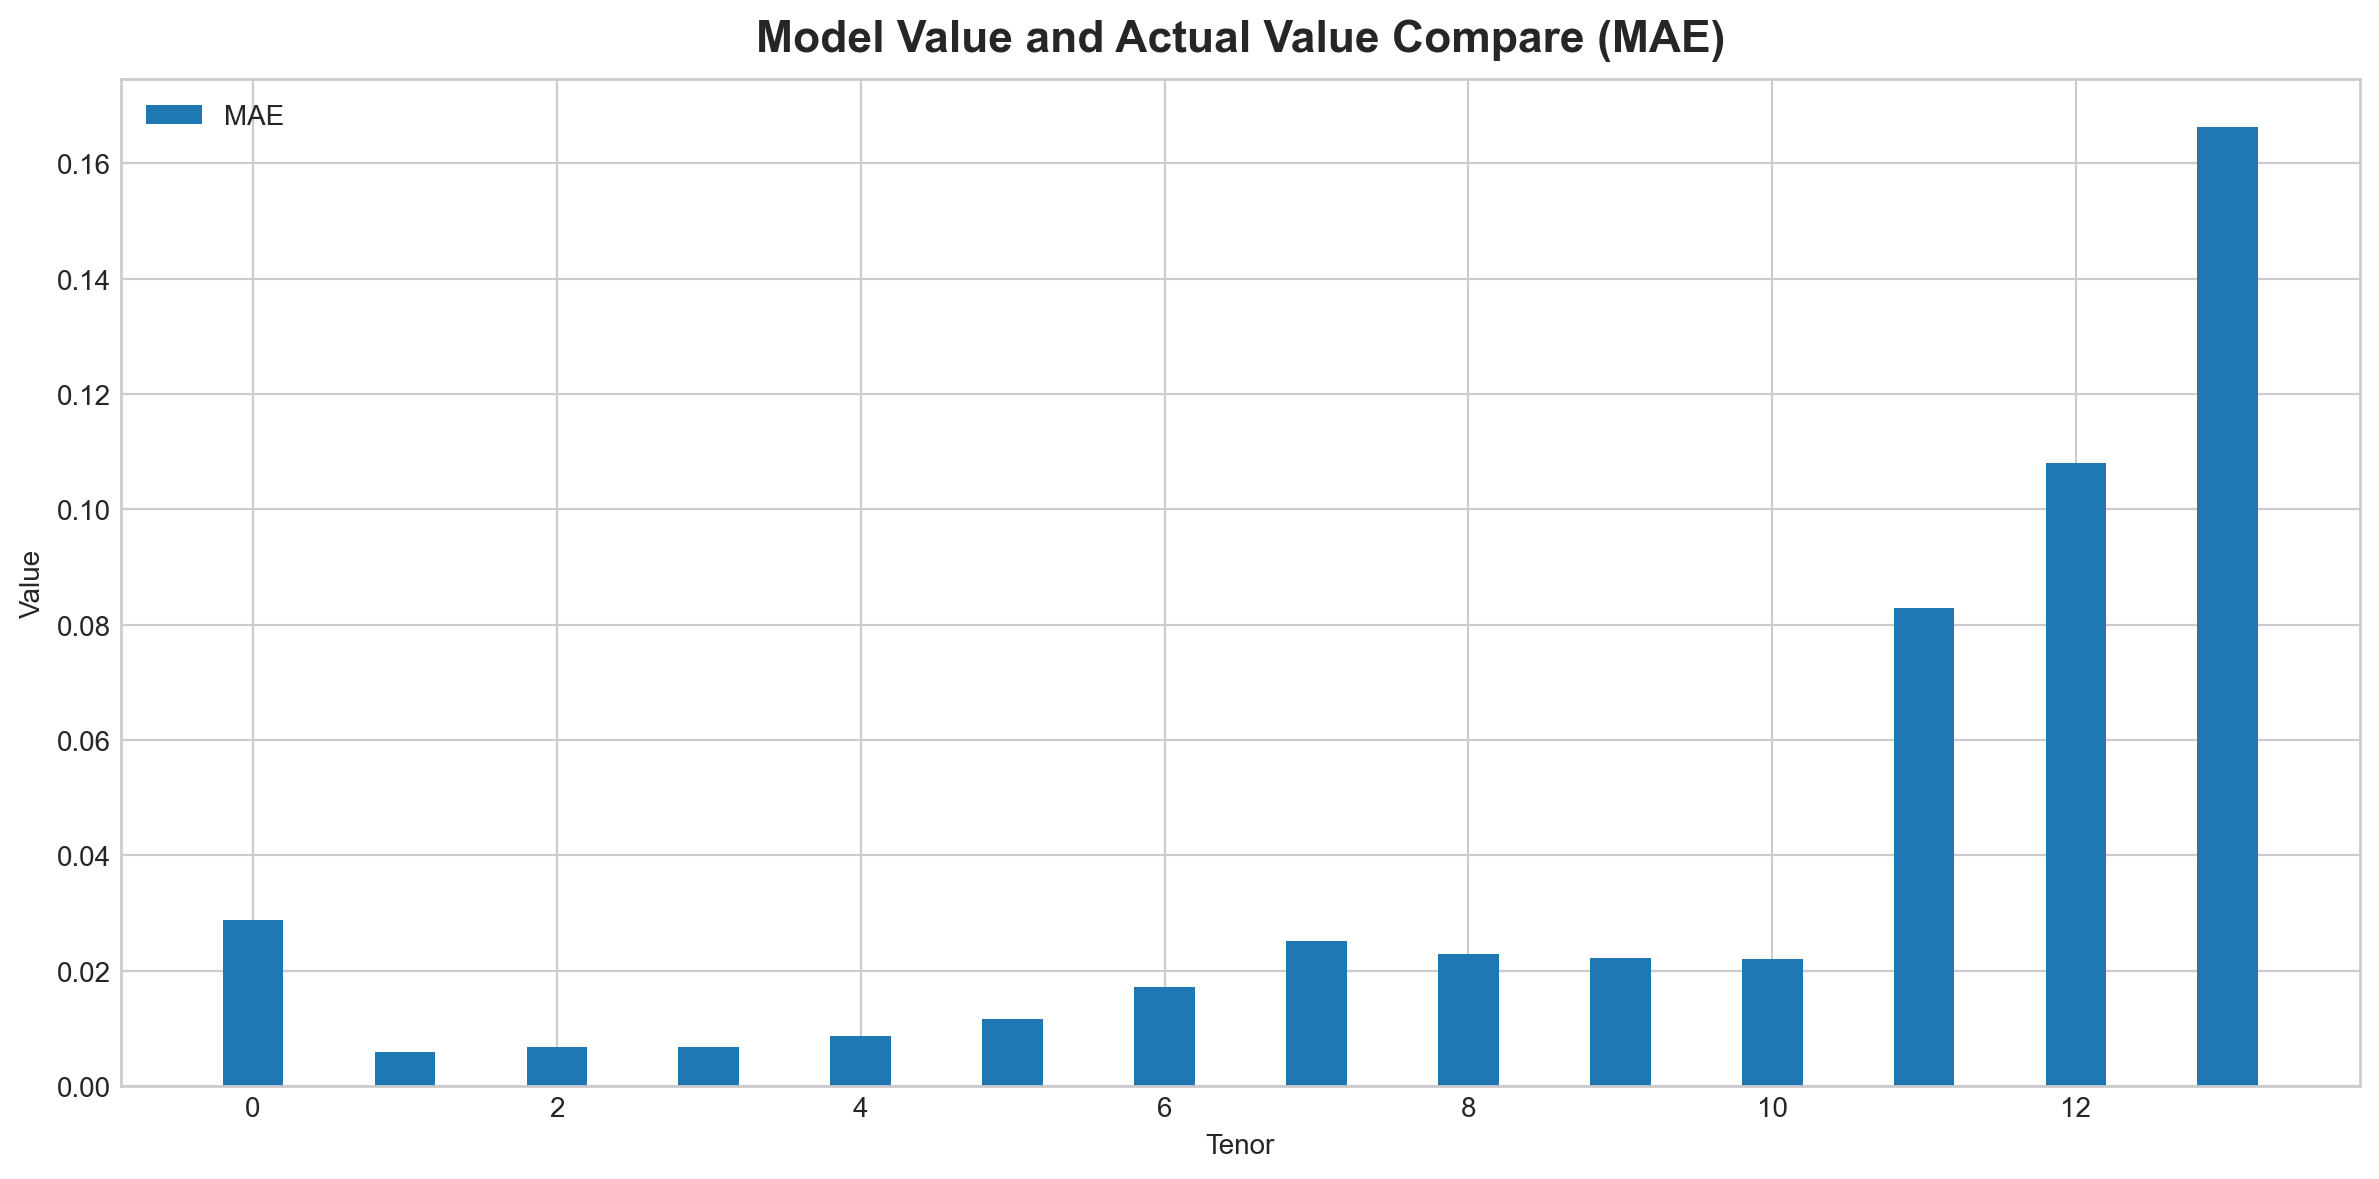

In [16]:
# 可视化误差
fig, ax = plt.subplots(figsize=(12, 6))

totalWidth=0.8 # 一组柱状体的宽度
labelNums=2 # 一组有两种类别
barWidth=totalWidth/labelNums # 单个柱体的宽度
seriesNums=error_df.shape[0] # 一共有多少组

ax.bar([x for x in range(seriesNums)], error_df['MAE'], label="MAE", width=barWidth)
#ax.bar([x+barWidth for x in range(seriesNums)], error_df['RMSE'], label="RMSE", width=barWidth)

#plt.xticks([x+barWidth/2*(labelNums-1) for x in range(seriesNums)], error_df['Tenor'])
plt.xlabel("Tenor")
plt.ylabel("Value")
plt.title("Model Value and Actual Value Compare (MAE)")
plt.legend()
plt.show()


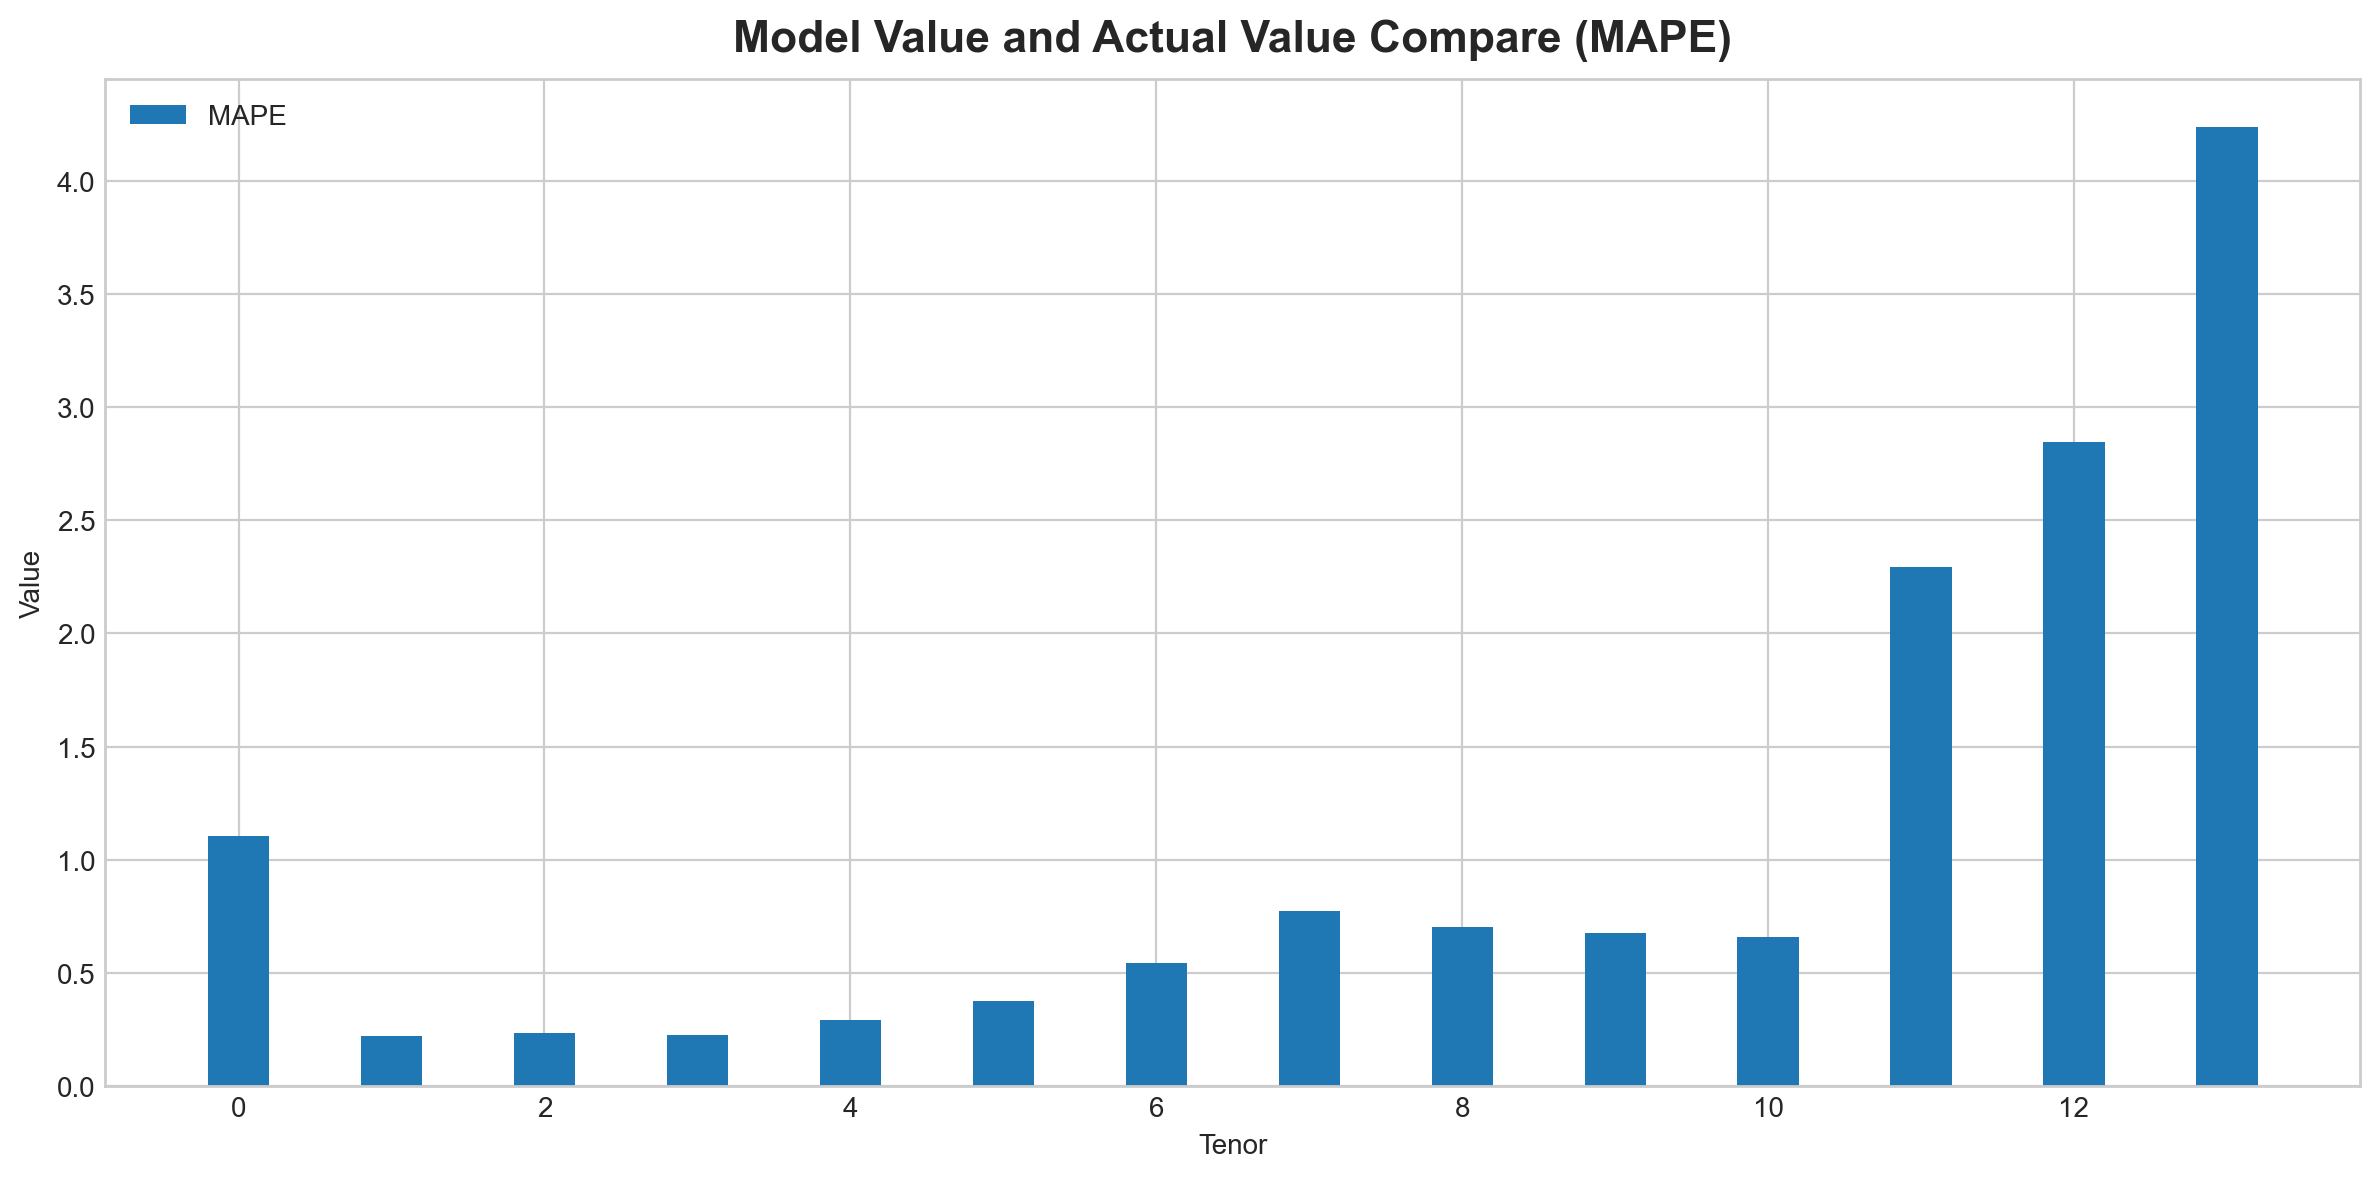

In [17]:
# 可视化误差
fig, ax = plt.subplots(figsize=(12, 6))

totalWidth=0.8 # 一组柱状体的宽度
labelNums=2 # 一组有两种类别
barWidth=totalWidth/labelNums # 单个柱体的宽度
seriesNums=error_df.shape[0] # 一共有多少组

ax.bar([x for x in range(seriesNums)], error_df['MAPE'], label="MAPE", width=barWidth)
#ax.bar([x+barWidth for x in range(seriesNums)], error_df['MAE'], label="MAE", width=barWidth)

#plt.xticks([x+barWidth/2*(labelNums-1) for x in range(seriesNums)], error_df['Tenor'])
plt.xlabel("Tenor")
plt.ylabel("Value")
plt.title("Model Value and Actual Value Compare (MAPE)")
plt.legend()
plt.show()


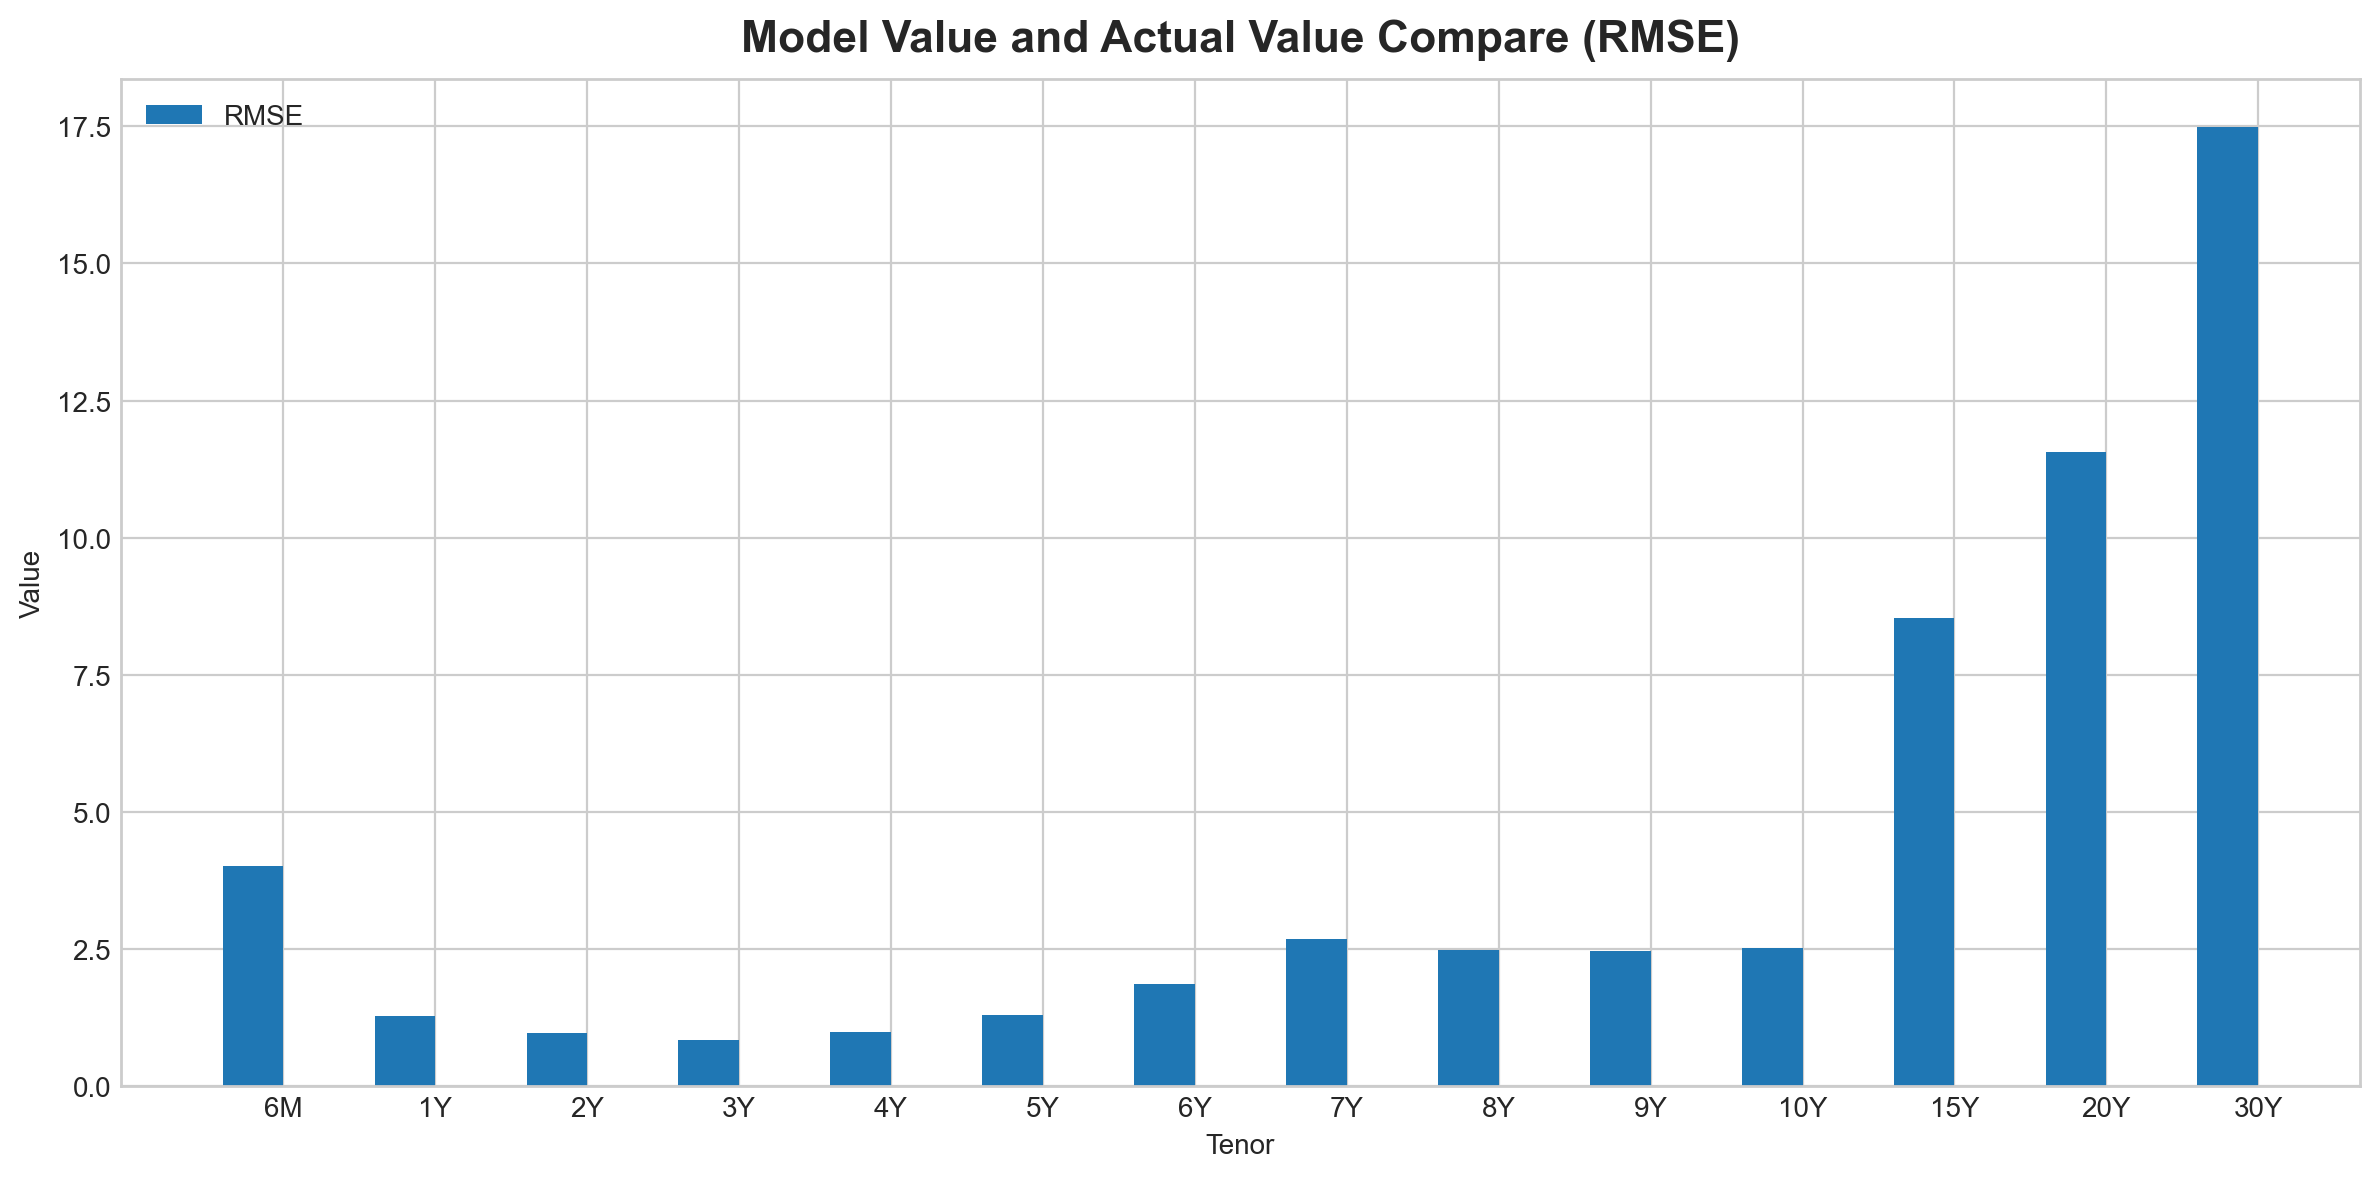

In [18]:
# 可视化误差
fig, ax = plt.subplots(figsize=(12, 6))

totalWidth=0.8 # 一组柱状体的宽度
labelNums=2 # 一组有两种类别
barWidth=totalWidth/labelNums # 单个柱体的宽度
seriesNums=error_df.shape[0] # 一共有多少组

ax.bar([x for x in range(seriesNums)], error_df['RMSE'], label="RMSE", width=barWidth)
#ax.bar([x+barWidth for x in range(seriesNums)], error_df['MAPE'], label="MAPE", width=barWidth)

plt.xticks([x+barWidth/2*(labelNums-1) for x in range(seriesNums)], error_df['Tenor'])
plt.xlabel("Tenor")
plt.ylabel("Value")
plt.title("Model Value and Actual Value Compare (RMSE)")
plt.legend()
plt.show()

In [19]:


# 保存模型值
model_ytm_df.to_csv('./data/CN_Bootstrap_Model_Yield.csv', index=False, encoding="utf-8-sig")

# 保存模型值与真实值的误差
error_df.to_csv('./data/Bootstrap_Compare.csv', index=False, encoding="utf-8-sig")

In [20]:
error_df

,Tenor,MAE,MAPE,RMSE
0,6M,0.028890,1.102814,4.017810
1,1Y,0.005916,0.219974,1.276957
2,2Y,0.006757,0.236811,0.969887
3,3Y,0.006714,0.227415,0.847472
4,4Y,0.008742,0.290399,0.988364
5,5Y,0.011574,0.375070,1.291794
6,6Y,0.017237,0.545348,1.864713
7,7Y,0.025209,0.775412,2.683489
8,8Y,0.022932,0.701253,2.475007
9,9Y,0.022276,0.674591,2.465692
